# Steps involved in creating a neural network #

1) Define the model
2) Compile the model
3) Fit the model


In [2]:
# Import iris dataset #
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                    columns=iris['feature_names'] + ['target'])
iris_df = iris_df.loc[iris_df['target'] != 2]

feature_vector = iris_df.columns.str.contains('cm')
X = iris_df.loc[:,feature_vector]
Y = iris_df[['target']]

# Split the dataset into test and train datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=0)

# """
# Objective - Convert the dataset to binary dataset
# 1. Convert it to a dataframe. Why? What is a dataframe? DONE
# 2. Filter target with !=2 and features with corresponding value. DONE
# 3. What is the current data type of iris variable? DONE
#     + Bunch data type by sklearn. A dictionary with two numpy arrays -- data and target.
#     Contains additional details about the dataset as well.
# 4. Qs
#     + Cross check the parameters in train_test_split()
# """

# Check class distribution #
print(iris_df['target'].value_counts()[0]/iris_df.shape[0])
print(iris_df['target'].value_counts()[1]/iris_df.shape[0])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


# Logistic regression using DNN #
    1. The model
    2. Confusion matrix
    3. Classification report

__The Model__

In [2]:
### Logistic regression using DNN ###
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

np.random.seed(7)
nb_classes = 4

# Defining model #

model = Sequential()
model.add(Dense(1,input_dim=4,activation='sigmoid'))

# Compile the model #

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model #

# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=10)
model.fit(x_train, y_train, epochs=200, batch_size=10, verbose=0)
# Evaluate the model #

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# """
# Classification report and optimization
#     1. Adding an exhaustive classification report
#     2. Analyse the report
#     3. Improve the model
#     4. Cross check the existing code
# """


Using TensorFlow backend.


60/60 [==============================] - 0s 499us/step

acc: 93.33%


**K fold cross validation**

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

seed = 7
numpy.random.seed(seed)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(1,input_dim=4,activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    # model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
    model.fit(X.iloc[train], Y.iloc[train], epochs=90, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X.iloc[test], Y.iloc[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

acc: 100.00%
acc: 100.00%
acc: 50.00%
acc: 90.00%
acc: 100.00%
acc: 90.00%
acc: 100.00%
acc: 50.00%
acc: 100.00%
acc: 100.00%
88.00% (+/- 19.39%)


__ROC Curve and Confusion Matrix__

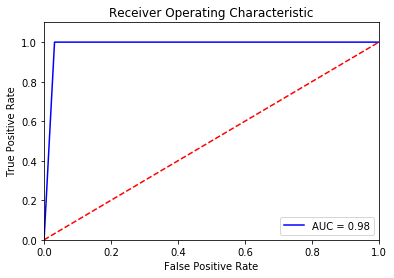

[[31  1]
 [ 0 28]]


In [9]:
# Prediction #
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Plot ROC curve. Sensitivity vs specificity
# Try changing the threshold value
# prediction.shape
# print(prediction)

# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Remove the 3rd class #
# Loss function and response variable encoding(y_observed) #

__Classification Report__

In [5]:
target_names = [iris.target_names[0], iris.target_names[1]]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      0.97      0.98        32
 versicolor       0.97      1.00      0.98        28

avg / total       0.98      0.98      0.98        60



# Scikit learn model #

In [6]:
# Import and create an instance of your model(Logistic regression)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()


In [7]:
# Train your model using the training dataset

logisticRegr.fit(x_train,y_train)

C:\Users\shakk\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# Predict the output 

predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test,y_test)
print(score)

1.0


# Qs/Doubts #
1. Core methods to analyse
    + Sequential
    + add
    + compile
    + fit
    + evaluate
2. What exactly is sequential for?
3. Classification report
    + precision
    + recall
    + f1 score
    + support
